<a href="https://colab.research.google.com/github/mannmoshe/image-processing/blob/main/hough_transform_line_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests 
import re

In [28]:
file_path = 'https://raw.githubusercontent.com/mannmoshe/image-processing/main/FlickerLine_5Hz_Clear.csv'

In [31]:
r = requests.get(file_path)
sizeX = int(re.search('sizeX: (.*) sizeY', r.text[:1000]).group(1))
sizeY = int(re.search('sizeY: (.*)\n', r.text[:1000]).group(1))
print(sizeX, sizeY)

640 480


In [32]:
five_hz_clear: pd.DataFrame = pd.read_csv(file_path, skiprows=1)
five_hz_clear.head()

,timestamp,x,y,polarity
0,1672940686094939,38,158,0
1,1672940686094939,55,5,0
2,1672940686094939,65,156,0
3,1672940686094939,102,296,1
4,1672940686094939,131,47,1


In [33]:
five_hz_clear_with_polarity = five_hz_clear[five_hz_clear["polarity"] == 1].reset_index(drop=True)
five_hz_clear_without_polarity = five_hz_clear[five_hz_clear["polarity"] == 0].reset_index(drop=True)
five_hz_clear_with_polarity.head()

,timestamp,x,y,polarity
0,1672940686094939,102,296,1
1,1672940686094939,131,47,1
2,1672940686094939,362,282,1
3,1672940686094939,505,474,1
4,1672940686094939,578,6,1


In [34]:
five_hz_clear_with_polarity = five_hz_clear_with_polarity[(five_hz_clear_with_polarity["y"] > 140) &
                                                         (five_hz_clear_with_polarity["y"] > 160)]
five_hz_clear_with_polarity.head()

,timestamp,x,y,polarity
0,1672940686094939,102,296,1
2,1672940686094939,362,282,1
3,1672940686094939,505,474,1
5,1672940686094939,612,321,1
6,1672940686095128,0,318,1


In [36]:
max_r = int(np.sqrt(sizeX**2 + sizeY**2))
max_r

800

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 4, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

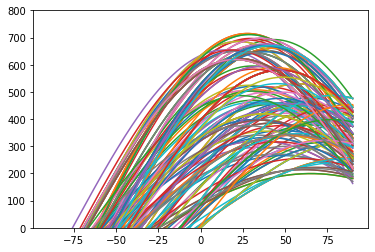

In [49]:
theta = np.arange(-90, 90, 0.1)
matrix = np.zeros((max_r, len(theta)), dtype=np.uint8)

# https://www.youtube.com/watch?v=M43yXpp2qW8
for index in range(len(five_hz_clear_with_polarity[:200])):
    x = five_hz_clear_with_polarity.iloc[index, 1]
    y = five_hz_clear_with_polarity.iloc[index, 2]
    r_list = []
    r = x*np.cos(np.deg2rad(theta)) + y*np.sin(np.deg2rad(theta))
    r_list.append(r)
    plt.ylim([0, 800])
    plt.plot(theta, r)
    for theta_index in range(len(theta)):
        rho = int(x*np.cos(theta_index) + y*np.sin(theta_index)) 
        matrix[rho, theta_index] += 1
matrix

In [53]:
matrix.shape

(800, 1800)

In [50]:
np.amax(matrix)

20

In [52]:
np.where(matrix == np.amax(matrix))

(array([334]), array([80]))

In [54]:
theta[80]

-82.00000000000045

In [56]:
np.deg2rad(theta[80])

-1.4311699866353582

line equation: <br>
y = (-cos(theta)*x/sin(theta)) + rho/sin(theta)<br>
y = (-cos(-1.43)*x/sin(-1.43)) + 334/sin(-1.43)
comment: the axis in the plot should be reversed